# World Bank Education Data Analysis

## Load Data

Data taken from: [World Bank Data Repository](https://data.worldbank.org/topic/education?cid=EXT_TWBN_D_EXT)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
main_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/API_4_DS2_en_csv_v2_4522731.csv", skiprows=4)
main_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,53.669919,54.056784,54.383281,54.710292,55.119933,55.631102,...,69.108851,69.181105,69.159774,69.137615,68.946339,68.646606,68.321199,68.012289,67.545054,NaN
1,Aruba,ABW,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,43.847190,43.358346,42.925745,42.488756,41.950133,41.290098,...,19.593055,19.111724,18.703098,18.257495,17.980183,17.802447,17.620445,17.381938,17.314652,NaN
2,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,"Unemployment, male (% of male labor force) (mo...",SL.UEM.TOTL.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
country_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Metadata_Country_API_4_DS2_en_csv_v2_4522731.csv")
country_data.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


## Cleaning the Data

### Creating our Dataqset


In [5]:
main_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')

In [6]:
main_data['Indicator Name'].unique()

array(['Population ages 15-64 (% of total population)',
       'Population ages 0-14 (% of total population)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Unemployment, male (% of male labor force) (modeled ILO estimate)',
       'Unemployment, female (% of female labor force) (modeled ILO estimate)',
       'Labor force, total',
       'Labor force, female (% of total labor force)',
       'Probability of dying among youth ages 20-24 years (per 1,000)',
       'Probability of dying among adolescents ages 15-19 years (per 1,000)',
       'Probability of dying among adolescents ages 10-14 years (per 1,000)',
       'Probability of dying among children ages 5-9 years (per 1,000)',
       'Number of deaths ages 20-24 years',
       'Number of deaths ages 15-19 years',
       'Number of deaths ages 10-14 years',
       'Number of deaths ages 5-9 years',
       'Government expenditure on education, total (% of GDP)',
       'Government expenditure o

In [8]:
#subset of data since we are only interested in the unemployment of females 
main_data_unem = main_data[main_data['Indicator Name']=='Unemployment, female (% of female labor force) (modeled ILO estimate)']
main_data_unem.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
4,Aruba,ABW,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,Africa Eastern and Southern,AFE,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.920877,6.869008,6.987366,7.106266,7.203034,7.216032,7.362899,8.023405,8.708126,NaN
328,Afghanistan,AFG,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,14.248000,14.152000,14.094000,14.084000,14.063000,14.012000,14.065000,16.863001,19.090000,NaN
490,Africa Western and Central,AFW,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.589035,5.196423,5.139525,6.187513,6.544402,6.169725,5.804865,6.491670,6.667652,NaN
652,Angola,AGO,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.741000,7.754000,7.781000,7.807000,7.810000,7.829000,7.835000,8.774000,9.112000,NaN


In [10]:
#No data prior to 1991, we need to remove the years that have no data
main_data_unem = main_data_unem[['Country Name', 'Country Code', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]

main_data_unem.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
4,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,Africa Eastern and Southern,AFE,7.846252,7.866403,7.859796,7.861505,7.904829,7.971418,8.029350,8.033045,...,7.062661,6.920877,6.869008,6.987366,7.106266,7.203034,7.216032,7.362899,8.023405,8.708126
328,Afghanistan,AFG,13.615000,13.816000,13.712000,13.722000,14.235000,14.000000,13.805000,13.833000,...,14.453000,14.248000,14.152000,14.094000,14.084000,14.063000,14.012000,14.065000,16.863001,19.090000
490,Africa Western and Central,AFW,4.357443,4.553999,4.568860,4.567161,4.556843,4.589577,4.632976,4.711834,...,4.858016,4.589035,5.196423,5.139525,6.187513,6.544402,6.169725,5.804865,6.491670,6.667652
652,Angola,AGO,3.606000,3.584000,3.579000,3.502000,3.441000,3.404000,3.374000,3.338000,...,7.715000,7.741000,7.754000,7.781000,7.807000,7.810000,7.829000,7.835000,8.774000,9.112000


In [11]:
country_data.columns

Index(['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName',
       'Unnamed: 5'],
      dtype='object')

In [12]:
country_data = country_data[['Country Code', 'Region', 'IncomeGroup']]
country_data.head()

,Country Code,Region,IncomeGroup
0,ABW,Latin America & Caribbean,High income
1,AFE,NaN,NaN
2,AFG,South Asia,Low income
3,AFW,NaN,NaN
4,AGO,Sub-Saharan Africa,Lower middle income


In [13]:
#merging the two datasets
merged_data = pd.merge(main_data_unem,country_data, on='Country Code')
merged_data.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,Region,IncomeGroup
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,High income
1,Africa Eastern and Southern,AFE,7.846252,7.866403,7.859796,7.861505,7.904829,7.971418,8.029350,8.033045,...,6.869008,6.987366,7.106266,7.203034,7.216032,7.362899,8.023405,8.708126,NaN,NaN
2,Afghanistan,AFG,13.615000,13.816000,13.712000,13.722000,14.235000,14.000000,13.805000,13.833000,...,14.152000,14.094000,14.084000,14.063000,14.012000,14.065000,16.863001,19.090000,South Asia,Low income
3,Africa Western and Central,AFW,4.357443,4.553999,4.568860,4.567161,4.556843,4.589577,4.632976,4.711834,...,5.196423,5.139525,6.187513,6.544402,6.169725,5.804865,6.491670,6.667652,NaN,NaN
4,Angola,AGO,3.606000,3.584000,3.579000,3.502000,3.441000,3.404000,3.374000,3.338000,...,7.754000,7.781000,7.807000,7.810000,7.829000,7.835000,8.774000,9.112000,Sub-Saharan Africa,Lower middle income


## Exploratory Data Analysis


In [14]:
merged_data.isna().sum()

Country Name     0
Country Code     0
1991            30
1992            30
1993            30
1994            30
1995            30
1996            30
1997            30
1998            30
1999            30
2000            30
2001            30
2002            30
2003            30
2004            30
2005            30
2006            30
2007            30
2008            30
2009            30
2010            30
2011            30
2012            30
2013            30
2014            30
2015            30
2016            30
2017            30
2018            30
2019            30
2020            30
2021            30
Region          48
IncomeGroup     49
dtype: int64

In [15]:
merged_data_clean = merged_data.dropna()
merged_data_clean.shape

(186, 35)

In [16]:
grouped_data_income = merged_data_clean.groupby(['IncomeGroup']).mean()
grouped_data_income


,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
IncomeGroup,,,,,,,,,,,,,,,,,,,,,
High income,8.142136,8.551102,9.461881,9.640915,9.374322,9.446136,9.032983,8.811017,8.815729,8.563576,...,9.053186,9.162831,8.805966,8.345322,7.904339,7.344559,6.760220,6.392864,7.671136,7.642847
Low income,6.568929,6.448000,6.298607,6.478143,6.557893,6.569393,6.568500,6.612464,6.718500,6.982571,...,7.946000,7.894464,7.860321,8.024714,8.071714,8.099750,8.096536,8.083893,9.029393,9.390464
Lower middle income,8.350827,8.352365,8.622577,8.780442,8.928808,8.993885,9.051635,9.235154,9.260865,9.275865,...,9.245846,9.227250,9.133288,9.378135,9.435365,9.424577,9.294769,9.260135,10.542615,10.802558
Upper middle income,11.390915,12.007766,12.460319,12.858277,13.370979,14.046596,14.168660,14.216745,14.240660,13.922319,...,12.309489,12.393936,12.377638,12.269872,12.221298,11.970298,11.647128,11.549936,13.017468,13.327426


In [17]:
transposed_income_group = grouped_data_income.transpose()
transposed_income_group

IncomeGroup,High income,Low income,Lower middle income,Upper middle income
1991,8.142136,6.568929,8.350827,11.390915
1992,8.551102,6.448000,8.352365,12.007766
1993,9.461881,6.298607,8.622577,12.460319
1994,9.640915,6.478143,8.780442,12.858277
1995,9.374322,6.557893,8.928808,13.370979
1996,9.446136,6.569393,8.993885,14.046596
1997,9.032983,6.568500,9.051635,14.168660
1998,8.811017,6.612464,9.235154,14.216745
1999,8.815729,6.718500,9.260865,14.240660
2000,8.563576,6.982571,9.275865,13.922319


Text(0, 0.5, '% Unemployment')

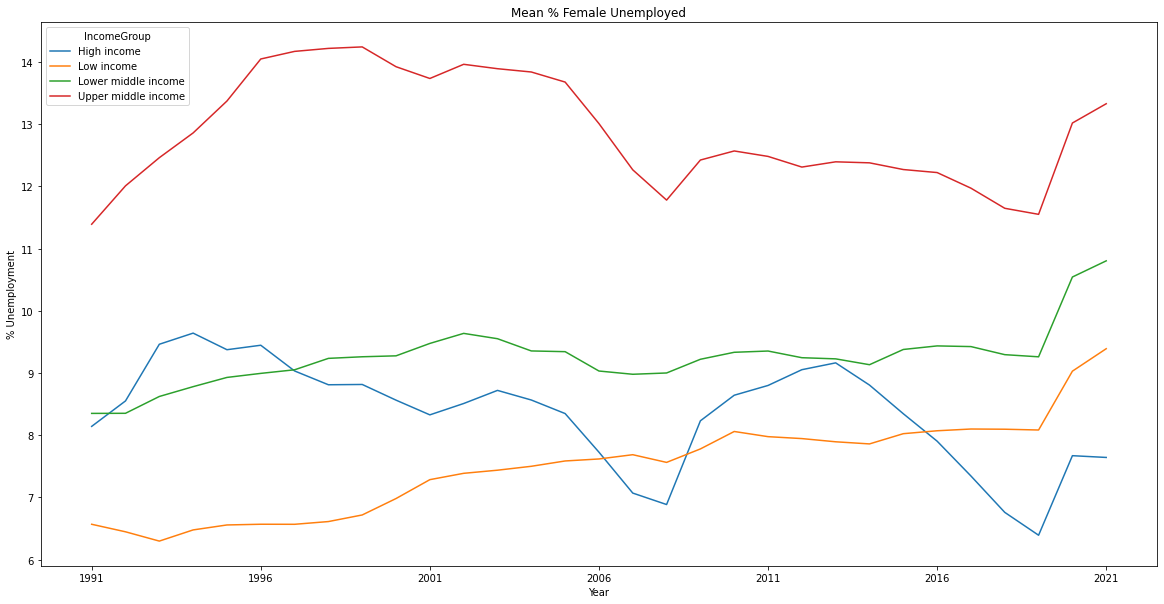

In [18]:
transposed_income_group.plot(figsize=(20,10))
plt.title("Mean % Female Unemployed")
plt.xlabel("Year")
plt.ylabel("% Unemployment")

Text(0, 0.5, '% Employment')

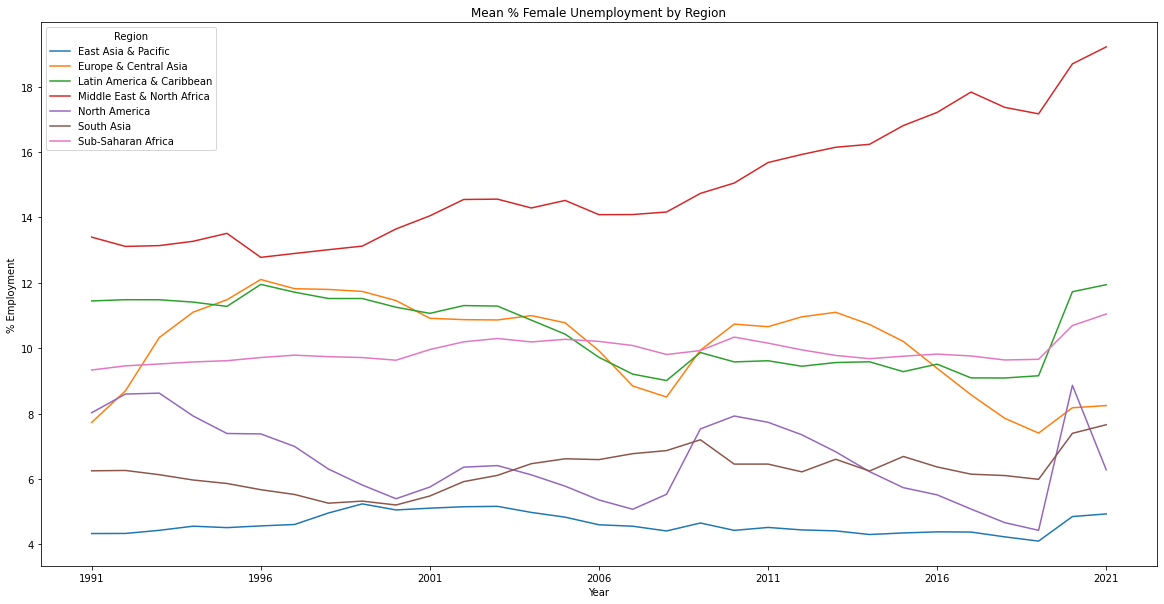

In [19]:
grouped_data_region = merged_data_clean.groupby(['Region']).mean()
transposed_region = grouped_data_region.transpose()

transposed_region.plot(figsize=(20,10))
plt.title("Mean % Female Unemployment by Region")
plt.xlabel("Year")
plt.ylabel("% Employment")

##ANOVA


In [20]:
import scipy.stats as stats


In [29]:
def sig(pvalue):
  if pvalue < 0.05:
    print("Significant")
  else:
    print("not significant")

merged_data_clean.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,Region,IncomeGroup
2,Afghanistan,AFG,13.615,13.816000,13.712,13.722000,14.235000,14.000,13.805000,13.833,...,14.152,14.094,14.084,14.063,14.012,14.065,16.863001,19.090,South Asia,Low income
4,Angola,AGO,3.606,3.584000,3.579,3.502000,3.441000,3.404,3.374000,3.338,...,7.754,7.781,7.807,7.810,7.829,7.835,8.774000,9.112,Sub-Saharan Africa,Lower middle income
5,Albania,ALB,10.272,27.106001,23.031,18.938999,14.122000,12.937,15.745000,19.778,...,15.456,17.114,14.467,12.499,11.871,11.322,13.168000,11.930,Europe & Central Asia,Upper middle income
8,United Arab Emirates,ARE,2.574,2.515000,2.476,2.404000,2.359000,2.436,2.501000,2.614,...,4.789,4.470,4.208,7.111,6.583,5.892,7.470000,8.125,Middle East & North Africa,High income
9,Argentina,ARG,5.745,6.708000,12.530,13.902000,22.167999,19.174,17.603001,14.016,...,8.374,8.624,9.234,9.473,10.541,10.698,12.375000,13.277,Latin America & Caribbean,Upper middle income


In [22]:
income_groups = merged_data_clean['IncomeGroup'].unique()
income_groups

array(['Low income', 'Lower middle income', 'Upper middle income',
       'High income'], dtype=object)

In [23]:
income_group_data =[]
for group in income_groups:
  income_group_data.append(merged_data_clean['2019'][merged_data_clean['IncomeGroup']==group])

In [30]:
statistic, pvalue =stats.f_oneway(income_group_data[0],income_group_data[1],
               income_group_data[2],income_group_data[3])

print(f'Statistic:{statistic}  pvalue: {pvalue}')
sig(pvalue)


Statistic:4.458910916436511  pvalue: 0.004761170207877538
Significant


In [25]:
## ANova for region 

regions = merged_data_clean['Region'].unique()
regions

array(['South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia',
       'Middle East & North Africa', 'Latin America & Caribbean',
       'East Asia & Pacific', 'North America'], dtype=object)

In [31]:
regions_data = []
for region in regions:
  regions_data.append(merged_data_clean['2019'][merged_data_clean['Region']==region])

statistic, pvalue = stats.f_oneway(regions_data[0], regions_data[1],
                                  regions_data[2], regions_data[3],
                                  regions_data[4], regions_data[5],
                                  regions_data[6])

In [32]:
print(f'Statistic: {statistic} pvale:{pvalue}')
sig(pvalue)

Statistic: 8.535299199180436 pvale:3.672444000486214e-08
Significant


BOX PLOTS 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


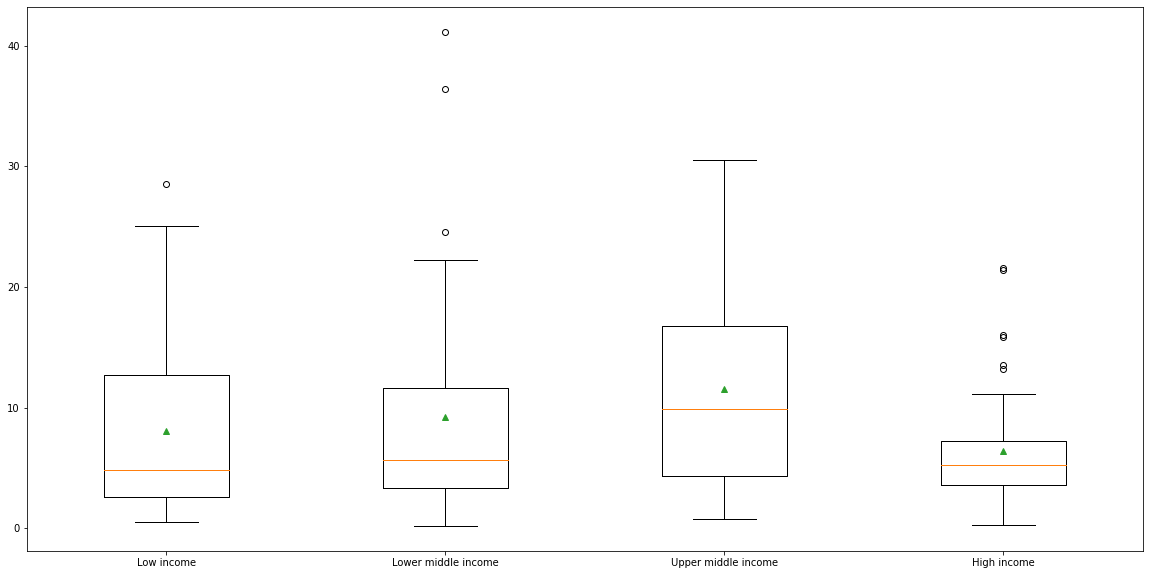

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

ax.set_title('Boxplot of % Female Unemployment by Income Group')
ax.boxplot(income_group_data, labels = income_groups, showmeans= True)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


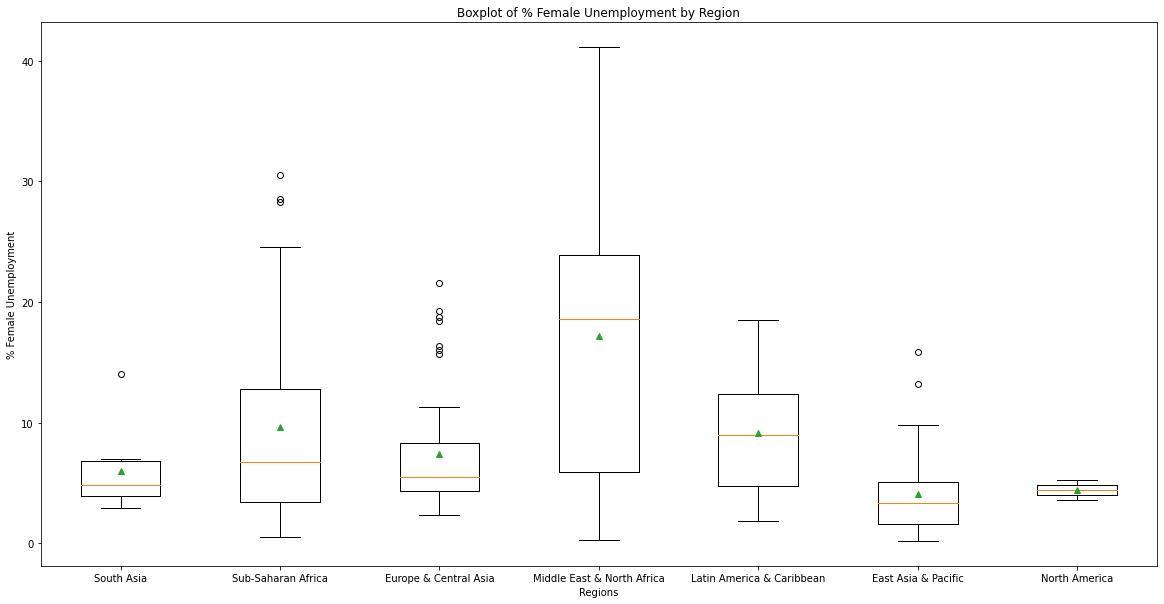

In [28]:
#Boxplot for Region

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

ax.set_title("Boxplot of % Female Unemployment by Region")

ax.boxplot(regions_data, labels = regions, showmeans=True)
plt.xlabel("Regions")
plt.ylabel("% Female Unemployment")
plt.show()